In [1]:
import fasttext

model = fasttext.load_model('model.ftz')

In [49]:
import pandas as pd

falsely_predicted_dict = dict()
not_predicted_dict = dict()

falsely_predicted_by_number_of_true_labels = { 1: dict(), 2: dict(), 3: dict()}
not_predicted_by_number_of_true_labels = { 1: dict(), 2: dict(), 3: dict()}

def hamming_loss(test_df):
    not_predicted = 0
    falsely_predicted = 0
    number_of_true_labels = 0
    number_of_predicted_labels = 0
    
    for index, row in test_df.iterrows():
        predict = model.predict(row['storyline'],3)
        true_labels = len(row['genre'].split(" "))
        number_of_true_labels += true_labels
        genres = []
        for i,p in enumerate(predict[1]):
            if(p > 0.140):
                genres.append(predict[0][i][9:])

        number_of_predicted_labels += len(genres)
        
        results = calculate_errors(genres, row['genre'].split(" "))
        not_predicted += results[0]
        falsely_predicted += results[1]
        
        if results[1] in falsely_predicted_by_number_of_true_labels[true_labels]:
            falsely_predicted_by_number_of_true_labels[true_labels][results[1]] += 1
        else:
            falsely_predicted_by_number_of_true_labels[true_labels][results[1]] = 1
            
        if results[0] in not_predicted_by_number_of_true_labels[true_labels]:
            not_predicted_by_number_of_true_labels[true_labels][results[0]] += 1
        else:
            not_predicted_by_number_of_true_labels[true_labels][results[0]] = 1
        
        
        
    return (not_predicted + falsely_predicted) / (28*len(test_df)), not_predicted, falsely_predicted, number_of_true_labels, number_of_predicted_labels
                
def calculate_errors(predicted, actual):
    not_predicted = 0
    falsely_predicted = 0
    
    for genre in actual:
        if genre not in predicted:
            not_predicted += 1
            if genre in not_predicted_dict:
                not_predicted_dict[genre] += 1
            else:
                not_predicted_dict[genre] = 1
    for genre in predicted:
        if genre not in actual:
            falsely_predicted += 1
            if genre in falsely_predicted_dict:
                falsely_predicted_dict[genre] += 1
            else:
                falsely_predicted_dict[genre] = 1
    
    return not_predicted, falsely_predicted

def print_evaluation_results(results):    
    hl, np, fp, ntl, npl = results
    print("Hamming loss\t\t\t{:.6f}".format(hl))
    print("Not predicted\t\t\t{}".format(np))
    print("Falsely predicted\t\t{}".format(fp))
    print("True number of labels\t\t{}".format(ntl))
    print("Predicted number of labels\t{}".format(npl))
  
df = pd.read_csv('dataset_test.csv')

print_evaluation_results(hamming_loss(df))

print(falsely_predicted_dict)
print(not_predicted_dict)
print(not_predicted_by_number_of_true_labels)
print(falsely_predicted_by_number_of_true_labels)

Hamming loss			0.008475
Not predicted			416
Falsely predicted		271
True number of labels		8131
Predicted number of labels	7986
{'Crime': 100, 'Action': 103, 'Drama': 21, 'Romance': 4, 'Comedy': 18, 'Mystery': 1, 'Animation': 3, 'Film-Noir': 1, 'Thriller': 9, 'Adventure': 4, 'Family': 1, 'Sci-Fi': 5, 'Fantasy': 1}
{'Drama': 98, 'History': 19, 'Romance': 21, 'Horror': 14, 'Thriller': 31, 'Biography': 57, 'Mystery': 9, 'Adventure': 26, 'Action': 12, 'Comedy': 51, 'Fantasy': 18, 'Crime': 13, 'Sci-Fi': 13, 'Music': 6, 'Western': 4, 'Sport': 5, 'Family': 11, 'Film-Noir': 1, 'Animation': 2, 'Musical': 4, 'War': 1}
{1: {0: 57, 1: 5}, 2: {0: 378, 1: 26, 2: 26}, 3: {0: 2251, 3: 62, 2: 57, 1: 33}}
{1: {0: 50, 2: 6, 1: 5, 3: 1}, 2: {0: 380, 2: 29, 1: 20, 3: 1}, 3: {0: 2294, 2: 61, 1: 48}}


{'Horror': 0, 'War': 0, 'Sport': 0, 'History': 0, 'Music': 0, 'Biography': 0, 'Western': 0, 'Mystery': 1, 'Film-Noir': 1, 'Family': 1, 'Fantasy': 1, 'Animation': 3, 'Romance': 4, 'Adventure': 4, 'Sci-Fi': 5, 'Thriller': 9, 'Comedy': 18, 'Drama': 21, 'Crime': 100, 'Action': 103}
{'Horror': 14, 'War': 1, 'Sport': 5, 'History': 19, 'Music': 6, 'Biography': 57, 'Western': 4, 'Mystery': 9, 'Film-Noir': 1, 'Family': 11, 'Fantasy': 18, 'Animation': 2, 'Romance': 21, 'Adventure': 26, 'Sci-Fi': 13, 'Thriller': 31, 'Comedy': 51, 'Drama': 98, 'Crime': 13, 'Action': 12}


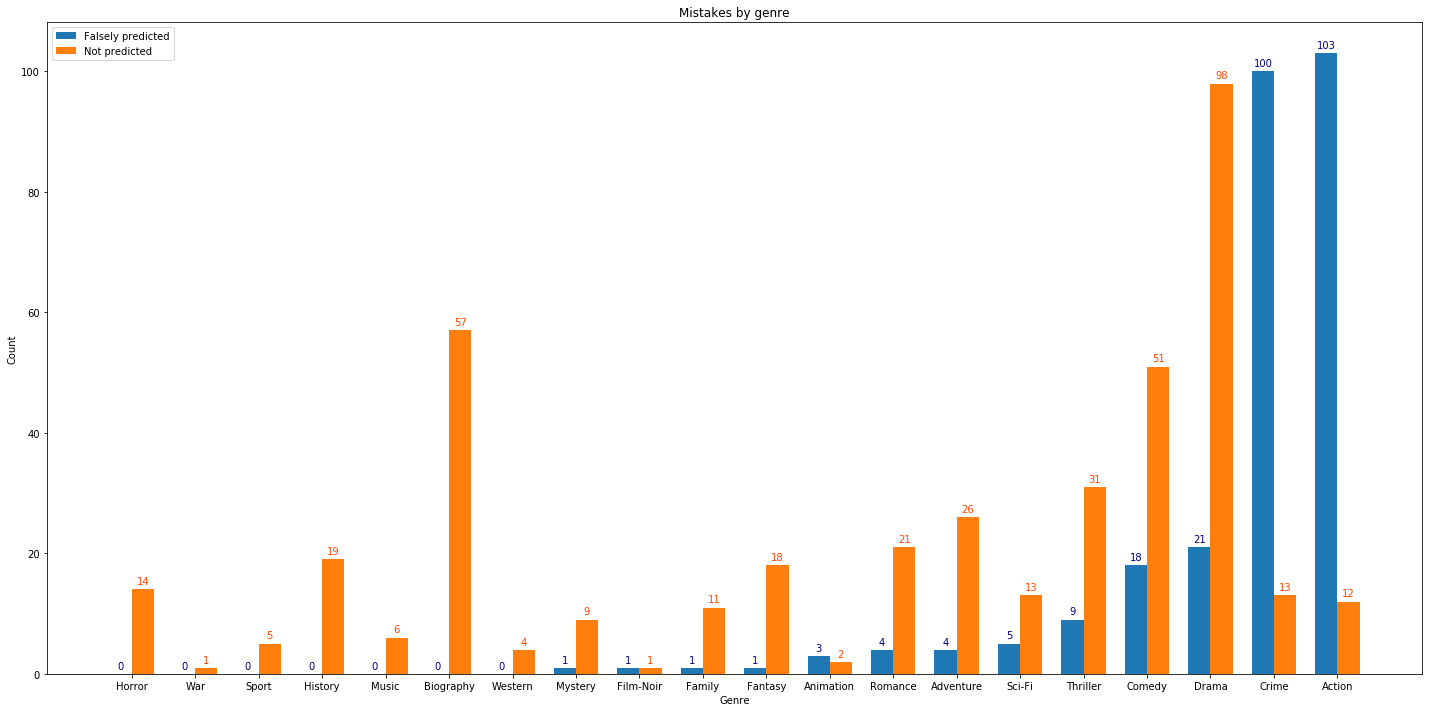

In [53]:
#plot
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import operator

listOfGenres = ["Action", "Drama", "Comedy", "Crime", 
                "Mystery", "Adventure", "Animation", "Horror", 
                "War", "Documentary", "Sport", "Talk-Show", 
                "News", "Film-Noir", "Romance", "Short", 
                "Thriller", "Family", "Fantasy", "Sci-Fi", 
                "History", "Music", "Biography", "Music", 
                "Reality-TV", "Western", "Game-Show", "Adult"]

for genre in listOfGenres:
    if genre not in not_predicted_dict:
        if genre in falsely_predicted_dict:
            not_predicted_dict[genre] = 0
    if genre not in falsely_predicted_dict:
        if genre in not_predicted_dict:
            falsely_predicted_dict[genre] = 0


def sort_by_another_dict(sorted_dict, dict_to_sort):
    output = dict()
    for key in sorted_dict.keys():
        output[key] = dict_to_sort[key]
    return output

sorted_false = dict(sorted(falsely_predicted_dict.items(), key=operator.itemgetter(1)))
sorted_not = sort_by_another_dict(sorted_false, not_predicted_dict)

print(sorted_false)
print(sorted_not)

labels = list(sorted_false.keys())
false_values = list(sorted_false.values())
not_values = list(sorted_not.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2, false_values, width, label='Falsely predicted')
rects2 = ax.bar(x + width/2, not_values, width, label='Not predicted')

ax.set_ylabel('Count')
ax.set_xlabel('Genre')
ax.set_title('Mistakes by genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects, c):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=c)
        
autolabel(rects1, (0.0, 0.0, 0.5, 1.0))
autolabel(rects2, (1.0, 0.27, 0.0, 1.0))

fig.tight_layout()

plt.savefig('results.png')
plt.show()

In [51]:
falsely_predicted_by_number_of_true_labels[3][3] = 0
print(not_predicted_by_number_of_true_labels)
print(falsely_predicted_by_number_of_true_labels)

{1: {0: 57, 1: 5}, 2: {0: 378, 1: 26, 2: 26}, 3: {0: 2251, 3: 62, 2: 57, 1: 33}}
{1: {0: 50, 2: 6, 1: 5, 3: 1}, 2: {0: 380, 2: 29, 1: 20, 3: 1}, 3: {0: 2294, 2: 61, 1: 48, 3: 0}}


{1: {0: 57, 1: 5}, 2: {0: 378, 1: 26, 2: 26}, 3: {0: 2251, 1: 33, 2: 57, 3: 62}}
[{0: 57, 1: 5}, {0: 378, 1: 26, 2: 26}, {0: 2251, 1: 33, 2: 57, 3: 62}]


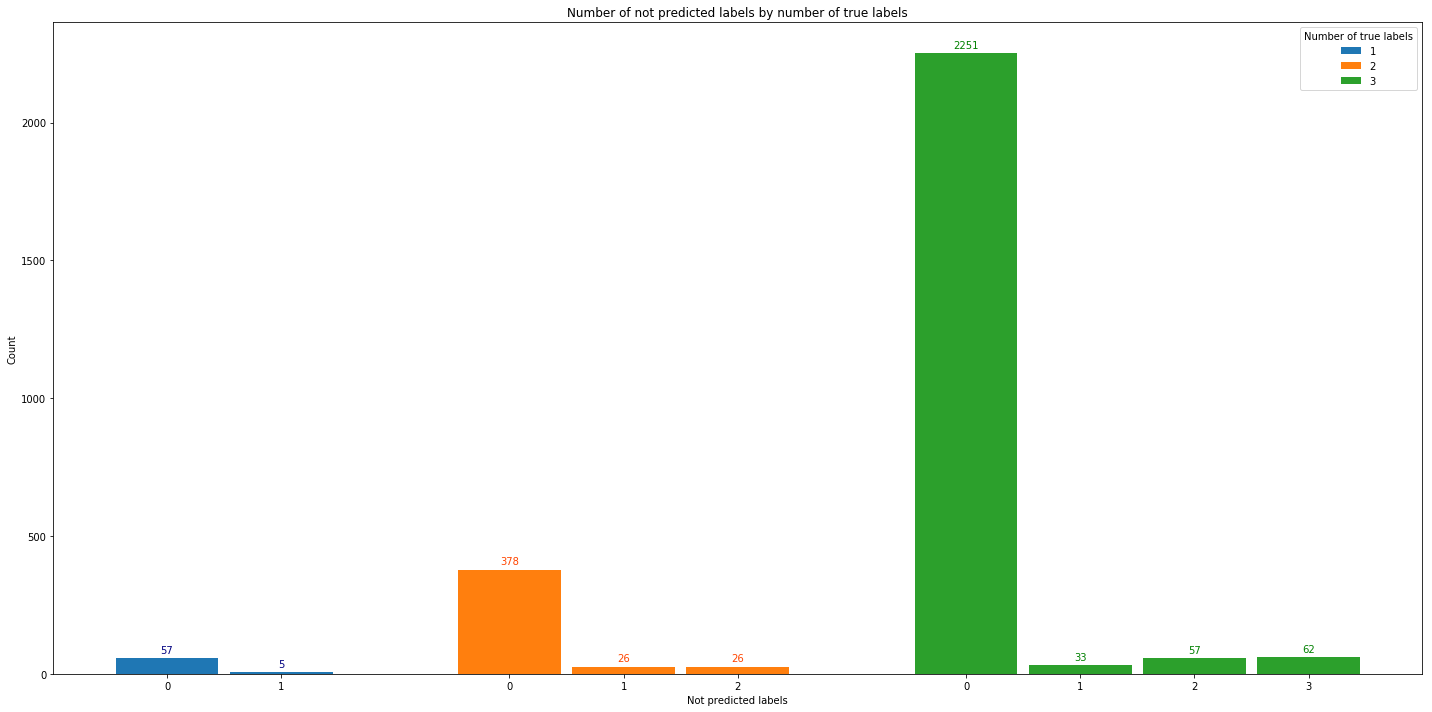

In [46]:
sorted_not_predicted_by_number_of_true_labels = dict()

for key in not_predicted_by_number_of_true_labels:
    sorted_not_predicted_by_number_of_true_labels[key] = dict(sorted(not_predicted_by_number_of_true_labels[key].items(), key=operator.itemgetter(0)))
print(sorted_not_predicted_by_number_of_true_labels)

labels = [0, 1, 0, 1, 2, 0, 1, 2, 3]
print(list(sorted_not_predicted_by_number_of_true_labels.values()))

y1 = list(sorted_not_predicted_by_number_of_true_labels[1].values())
y2 = list(sorted_not_predicted_by_number_of_true_labels[2].values())
y3 = list(sorted_not_predicted_by_number_of_true_labels[3].values())

width = 0.9
groupgap = 1

x1 = np.arange(len(y1))
x2 = np.arange(len(y2)) + groupgap + len(y1)
x3 = np.arange(len(y3)) + 2 * groupgap + len(y1) + len(y2)

ind = np.concatenate((x1, x2, x3))

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x1, y1, width, label='1')
rects2 = ax.bar(x2, y2, width, label='2')
rects3 = ax.bar(x3, y3, width, label='3')

ax.set_ylabel('Count')
ax.set_xlabel('Not predicted labels')
ax.set_title('Number of not predicted labels by number of true labels')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend(title='Number of true labels')
        
autolabel(rects1, (0.0, 0.0, 0.5, 1.0))
autolabel(rects2, (1.0, 0.27, 0.0, 1.0))
autolabel(rects3, (0.0, 0.5, 0.0, 1.0))

fig.tight_layout()

plt.savefig('not_predicted_by_number_of_true_labels.png')
plt.show()

{1: {0: 50, 1: 5, 2: 6, 3: 1}, 2: {0: 380, 1: 20, 2: 29, 3: 1}, 3: {0: 2294, 1: 48, 2: 61, 3: 0}}
[{0: 50, 1: 5, 2: 6, 3: 1}, {0: 380, 1: 20, 2: 29, 3: 1}, {0: 2294, 1: 48, 2: 61, 3: 0}]


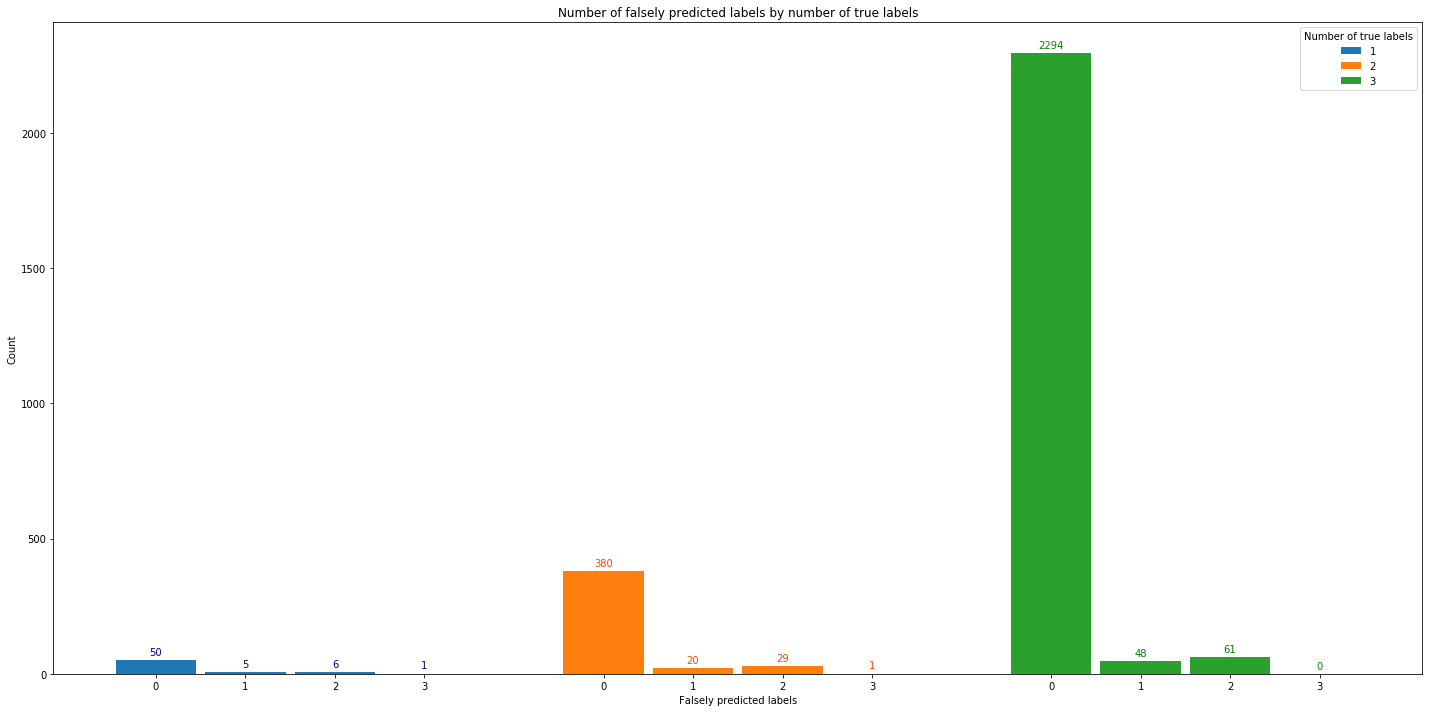

In [52]:
sorted_falsely_predicted_by_number_of_true_labels = dict()

for key in falsely_predicted_by_number_of_true_labels:
    sorted_falsely_predicted_by_number_of_true_labels[key] = dict(sorted(falsely_predicted_by_number_of_true_labels[key].items(), key=operator.itemgetter(0)))
print(sorted_falsely_predicted_by_number_of_true_labels)

labels = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
print(list(sorted_falsely_predicted_by_number_of_true_labels.values()))

y1 = list(sorted_falsely_predicted_by_number_of_true_labels[1].values())
y2 = list(sorted_falsely_predicted_by_number_of_true_labels[2].values())
y3 = list(sorted_falsely_predicted_by_number_of_true_labels[3].values())

width = 0.9
groupgap = 1

x1 = np.arange(len(y1))
x2 = np.arange(len(y2)) + groupgap + len(y1)
x3 = np.arange(len(y3)) + 2 * groupgap + len(y1) + len(y2)

ind = np.concatenate((x1, x2, x3))

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x1, y1, width, label='1')
rects2 = ax.bar(x2, y2, width, label='2')
rects3 = ax.bar(x3, y3, width, label='3')

ax.set_ylabel('Count')
ax.set_xlabel('Falsely predicted labels')
ax.set_title('Number of falsely predicted labels by number of true labels')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend(title='Number of true labels')
        
autolabel(rects1, (0.0, 0.0, 0.5, 1.0))
autolabel(rects2, (1.0, 0.27, 0.0, 1.0))
autolabel(rects3, (0.0, 0.5, 0.0, 1.0))

fig.tight_layout()

plt.savefig('falsely_predicted_by_number_of_true_labels.png')
plt.show()